# Lecture 10: Interpolation, integration, and statistics

In [1]:
#Imports that we'll need
import matplotlib.pyplot as plt
import numpy as np

<a id=interpolation></a>
# Interpolation

### Linear interpolation

Imagine you would like to interpolate between two points $(x_0, y_0)$ and $(x_1, y_1)$. You could do this by hand:

$$y(x) = y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0}$$

Simple enough, but it is annoying to look up or derive the formula. Also, what if you want values less than $x_0$ to stay at the value of $y_0$, and likewise for values greater than $x_1$? Then you need to add `if` statements, and check the logic, etc. Too much work.

Instead, there is a simple function for almost all of your interpolation needs: `interp1d`.

In [2]:
from scipy.interpolate import interp1d

x = (1, 2)
y = (5, 7)
print('Points:', list(zip(x, y)))

f = interp1d(x, y)
z = [1.25, 1.5, 1.75]
print('Interpolation:', list(zip(z, f(z))))

Points: [(1, 5), (2, 7)]
Interpolation: [(1.25, 5.5), (1.5, 6.0), (1.75, 6.5)]


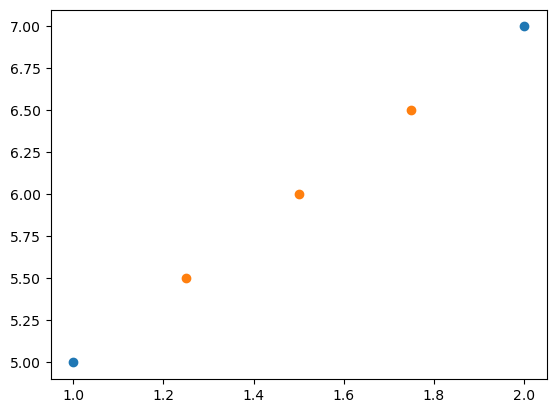

In [3]:
plt.scatter(x,y)
plt.scatter(z,f(z))

We can do this also with `np.interp`

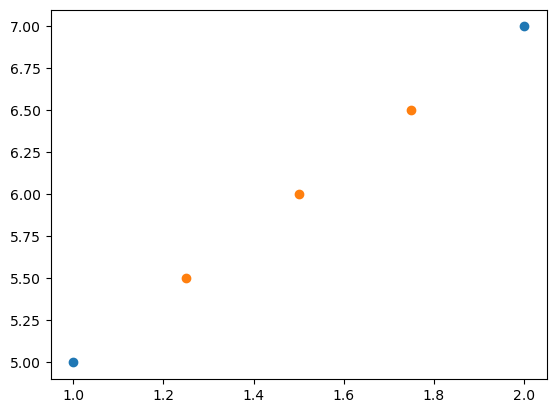

In [4]:
numpy_z = np.interp(z, x, y)
plt.scatter(x,y)
plt.scatter(z,numpy_z)

Let's return to `interp1d`. Right now, if you try to use an x-coordinate outside of the interval $[x_0, x_1]$, a `ValueError` will be raised:

In [5]:
f(2.5)

ValueError: A value (2.5) in x_new is above the interpolation range's maximum value (2).

This is because we haven't told `interp1d` how we want to handle the boundaries. This is done using the `fill_value` keyword argument. There are a few options:

1. Set values outside of the interval $[x_0, x_1]$ to a float.
2. Set values $< x_0$ to `below` and values $> x_1$ to `above` by passing a tuple, `(below, above)`.
3. Extrapolate points outside the interval by passing `extrapolate`.

We also need to tell `interp1d` not to raise a `ValueError` by setting the `bounds_error` keyword to `False`.

Option 1: [(0.5, 0.0), (1, 5.0), (1.5, 6.0), (2, 7.0), (2.5, 0.0)]
Option 2: [(0.5, 5.0), (1, 5.0), (1.5, 6.0), (2, 7.0), (2.5, 7.0)]
Option 3: [(0.5, 4.0), (1, 5.0), (1.5, 6.0), (2, 7.0), (2.5, 8.0)]


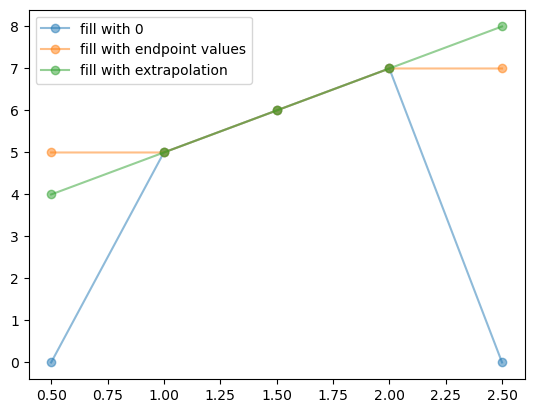

In [6]:
z = [0.5, 1, 1.5, 2, 2.5]

f = interp1d(x, y, bounds_error=False, fill_value=0)
print("Option 1:", list(zip(z, f(z))))
plt.plot(z,f(z), marker='o', alpha=0.5, label='fill with 0')

f = interp1d(x, y, bounds_error=False, fill_value=y)   # fill with endpoint values
print("Option 2:", list(zip(z, f(z))))
plt.plot(z,f(z), marker='o', alpha=0.5, label='fill with endpoint values')

f = interp1d(x, y, fill_value='extrapolate')   # bounds_error set to False automatically
print("Option 3:", list(zip(z, f(z))))
plt.plot(z,f(z), marker='o', alpha=0.5, label='fill with extrapolation')

plt.legend()

Option numpy: [(0.5, 5.0), (1, 5.0), (1.5, 6.0), (2, 7.0), (2.5, 7.0)]
Option numpy with left and right: [(0.5, 0.0), (1, 5.0), (1.5, 6.0), (2, 7.0), (2.5, 0.0)]


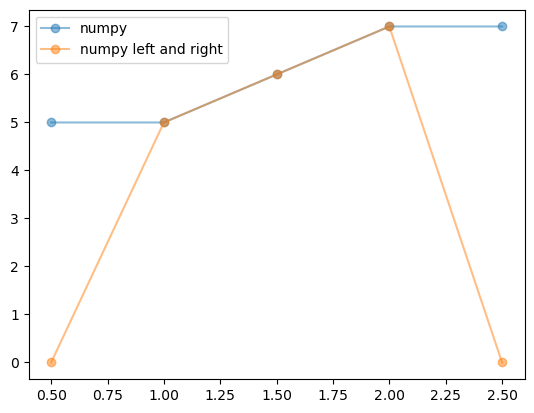

In [7]:
# This is what numpy by default does:
numpy_z = np.interp(z, x, y)
print("Option numpy:", list(zip(z, numpy_z)))
plt.plot(z,numpy_z, marker='o', alpha=0.5, label='numpy')

#We can change the limits with the 'left' and 'right' arguments:
numpy_z = np.interp(z, x, y, left=0, right=0)
print("Option numpy with left and right:", list(zip(z, numpy_z)))
plt.plot(z,numpy_z, marker='o', alpha=0.5, label='numpy left and right')

#There is no interpolation, though
      
plt.legend()

### Cubic spline interpolation

Cubic splines are what are most commonly used when you want to interpolate between points smoothly.

Cubic spline interpolation is so common, it has its own method, CubicSpline, which produces generally better results.

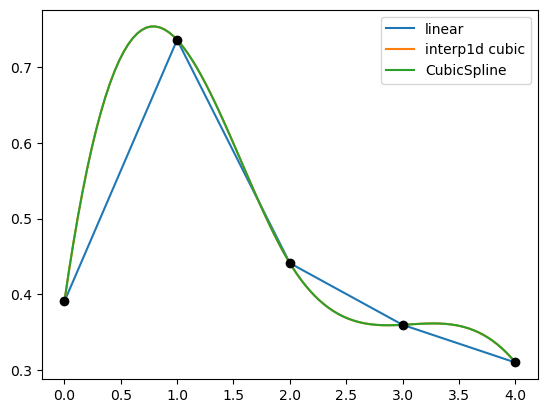

In [8]:
from scipy.interpolate import CubicSpline

npoints = 5
x = np.arange(npoints)
y = np.random.random(npoints)
plt.plot(x, y, label='linear')

f = interp1d(x, y, kind='cubic')
z = np.linspace(np.min(x), np.max(x), 100)
plt.plot(z, f(z), label='interp1d cubic')

f = CubicSpline(x, y)
z = np.linspace(np.min(x), np.max(x), 100)
plt.plot(z, f(z), label='CubicSpline')

# numpy does the same as interp1d
#numpy_z = np.interp(z, x, y)
#z = np.linspace(np.min(x), np.max(x), 100)
#plt.plot(z, numpy_z, label='Numpy')

plt.plot(x, y, 'ko')
plt.legend(loc='best');

# Numerical integration

Scipy integration routines are discussed in the [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). We will look at the two most common routines here.

## Function integration

`quad` is used to evaluate definite 1D numerical integrals. For example, assume we want to integrate a quadratic polynomial $f(x) = 3x^2 + 6x - 9$ over an interval $x \in [0, 5]$. Analytically, the answer is:

$$ \int_0^5 3x^2 + 6x - 9 \ dx = \left[ x^3 + 3x^2 - 9x \right]_{x = 0}^{x = 5} = 155 $$

In [9]:
from scipy.integrate import quad

def f(x):
    return 3*x**2 + 6*x - 9

quad(f, 0, 5)

(155.0, 1.832332444897697e-12)

The first parameter `quad` returns is the answer; the second is an estimate of the absolute error in the result.

For 2D, 3D, or n-dimensional integrals , use `dblquad`, `tplquad`, or `nquad`, respectively.

For some more interesting functions, Scipy's other function integration routines might be helpful:
* `quadrature` : [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)
* `romberg` : [Romberg integration](https://en.wikipedia.org/wiki/Romberg%27s_method)

For example, consider the $\mathrm{sinc}$ function:

$$
\mathrm{sinc}(x) \equiv
\begin{cases} 
1 & x = 0 \\
\frac{\sin(\pi x)}{\pi x} & \mathrm{otherwise}
\end{cases}
$$

/tmp/ipykernel_4056/492385219.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sin(np.pi*x) / (np.pi*x)
/tmp/ipykernel_4056/492385219.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  print(quad(sinc, -10, 10))   # fails


(nan, nan)
(0.9797763423077573, 8.02804156349741e-09)


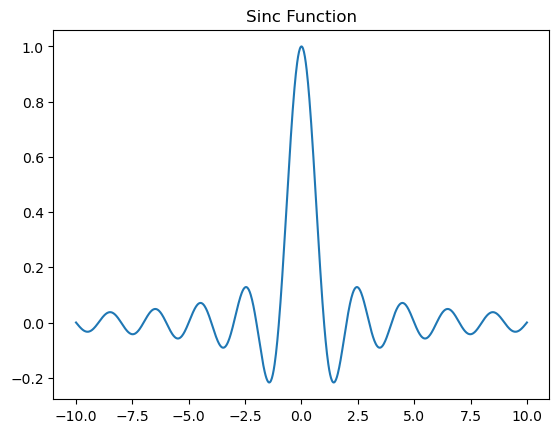

In [10]:
def sinc(x):
    return np.sin(np.pi*x) / (np.pi*x)


x = np.linspace(-10, 10, 1000)
y = sinc(x)
plt.plot(x, y)
plt.title('Sinc Function')

print(quad(sinc, -10, 10))   # fails

# numpys sinc handles the singularity correctly
print(quad(np.sinc, -10, 10))

`quad` struggles with $\mathrm{sinc}$, but it can be easily handled with Gaussian quadrature:

In [11]:
from scipy.integrate import quadrature

# quadrature may complain, but it will work in the end
print(quadrature(sinc, -10, 10)[0])

0.979776342307763


/tmp/ipykernel_4056/492385219.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sin(np.pi*x) / (np.pi*x)
/opt/anaconda/lib/python3.11/site-packages/scipy/integrate/_quadrature.py:370: AccuracyWarning: maxiter (50) exceeded. Latest difference = nan
  warnings.warn(


This result agrees with Mathematica to 13 decimal places (even though only 11 are shown). Note that the problem is the singularity at $x=0$; if we change the boundaries to, say, [-10.1, 10], then it works fine. Also, writing our sinc function more cleverly would eliminate the problem.

## Sample integration

If you have a collection of points that you want to integrate, you could use an [interpolation function](#interpolation) and pass it to `quad`. A better alternative is to use the purpose-built functions `trapz`, `romb`, and `simps`. Or use the numpy function `np.trapz`.

We will consider the $\mathrm{sinc}$ function again as an example. The most naive (and surprisingly robust) integration method is using the trapezoid rule, which is implemented in `trapz`:

In [12]:
from scipy.integrate import trapz

# 50 grid points
x = np.linspace(-10, 10)
y = sinc(x)
print('  50 points:', trapz(y, x))   # note the order of the arguments: y, x

# 1000 grid points
x = np.linspace(-10, 10, 1000)
y = sinc(x)
print('1000 points:', trapz(y, x))

  50 points: 0.9826316326559502
1000 points: 0.9797830227655555


`np.trapz` does the exact same thing:

In [13]:
x = np.linspace(-10, 10)
y = sinc(x)
print('  50 points, numpy:', np.trapz(y, x))

x = np.linspace(-10, 10, 1000)
y = sinc(x)
print('1000 points, numpy:', np.trapz(y, x))

  50 points, numpy: 0.9826316326559502
1000 points, numpy: 0.9797830227655555


# Statistics

### Continuous distributions

The `scipy.stats` package contains many important statistical distributions often fundamental to analyze data.

Let's start by looking at the most general function, a normal distribution.

In [16]:
from scipy.stats import norm

To plot it, we just have to use the `pdf()` method.

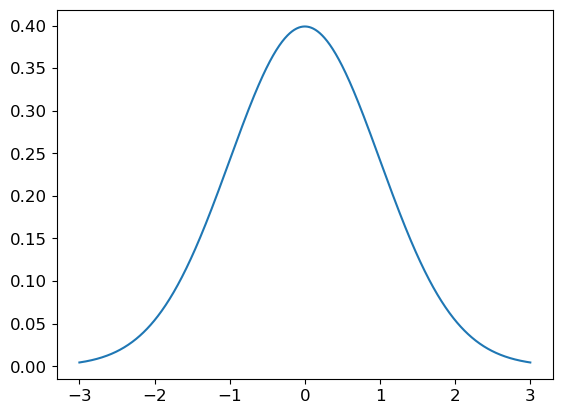

In [17]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, norm.pdf(x))

We can also very simply look at mean, standard deviation, and variance.

Mean: 0.0, standard deviation: 1.0, variance: 1.0


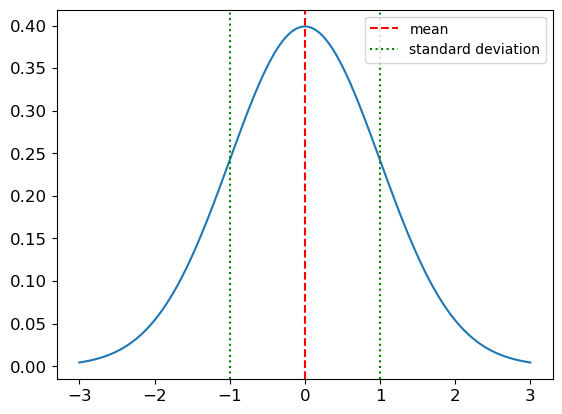

In [18]:
plt.plot(x, norm.pdf(x))

m = norm.mean()
std = norm.std()
var = norm.var()

plt.axvline(m, linestyle = '--', color = 'red', label = 'mean')
plt.axvline(m+std, color = 'green', linestyle = 'dotted', label = 'standard deviation')
plt.axvline(m-std, color = 'green', linestyle = 'dotted')

print(f"Mean: {m}, standard deviation: {std}, variance: {var}")

plt.legend()

A very useful tool is as well the *cumulative density function*, which we can use via the method `cdf()`.

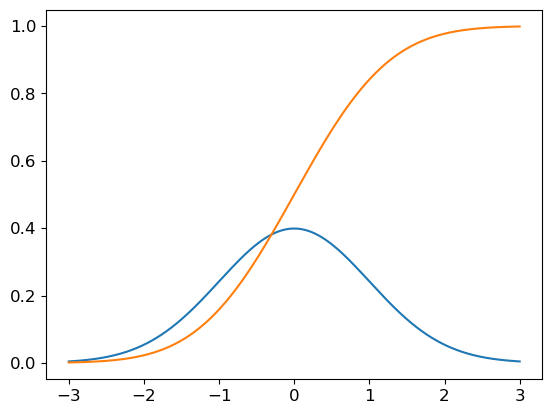

In [19]:
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))

Let's see the exponential distribution.

$$
p(x|\lambda) = \lambda e^{-\lambda x}
$$

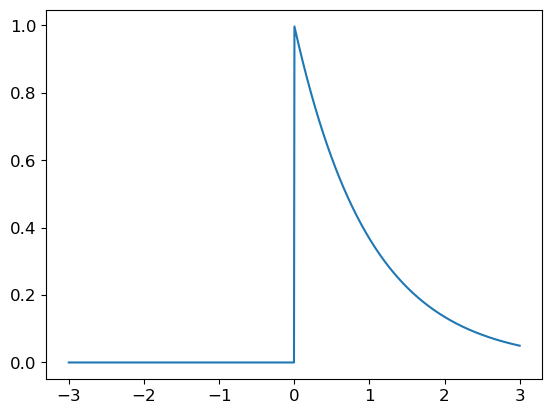

In [20]:
from scipy.stats import expon
plt.plot(x, expon.pdf(x))

Together with the cdf we can use the *percent point function*, the inverse of the cdf, via the method `ppf()`. It can be useful to find the median.

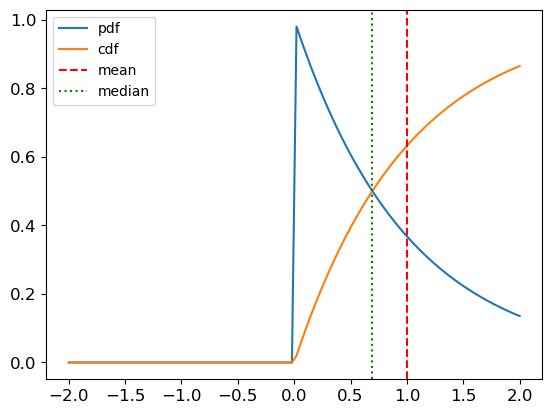

In [21]:
x = np.linspace(-2,2,100)
plt.plot(x, expon.pdf(x), label = 'pdf')
plt.plot(x, expon.cdf(x), label = 'cdf')
plt.axvline(expon.mean(), color = 'red', linestyle = '--', label = 'mean')
plt.axvline(expon.ppf(0.5), color = 'green', linestyle = 'dotted', label = 'median')
plt.legend()

With the argument `loc` we can change the location of the distribution (or its mean)

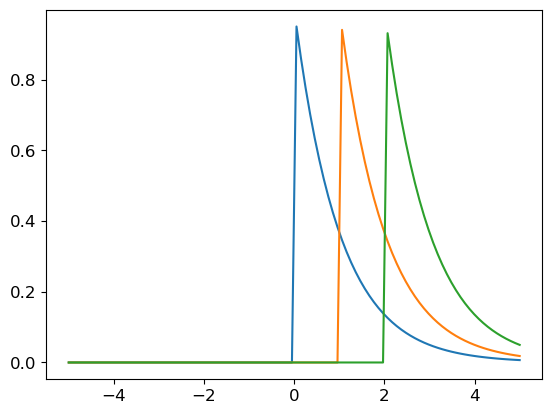

In [22]:
x = np.linspace(-5,5, 100)
plt.plot(x, expon.pdf(x))
plt.plot(x, expon.pdf(x, loc=1))
plt.plot(x, expon.pdf(x, loc=2))

With the argument `scale` we change the scale of the $x$ variable through the transformation `(x - loc) / scale`. As an example, changing the argument `scale` for the exponential distribution is equivalent to change $1/\lambda$.

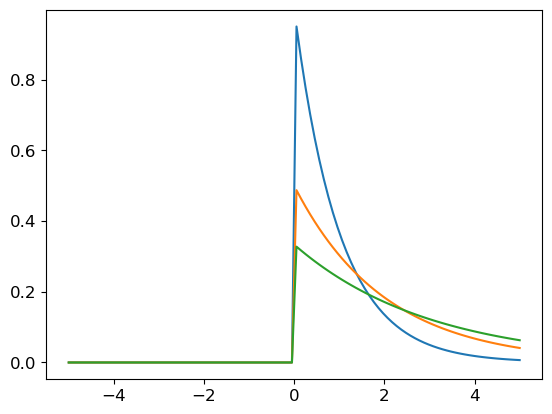

In [23]:
x = np.linspace(-5,5, 100)
plt.plot(x, expon.pdf(x))
plt.plot(x, expon.pdf(x, scale=2))
plt.plot(x, expon.pdf(x, scale=3))

### Discrete distributions

Discrete distributions must be handled differently from continuous distribusions. 
[Here](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) you can find all the discrete distribuions in `scipy.stats`. We will see here the Poisson distribution:

$$
p(k|\mu) = \frac{\mu^k}{k!}e^{-\mu}
$$

Here, $k$ is the number of measured counts, $\mu$ is a parameter, the expected value of $k$.


To understand it better, let's take an example. The [DarkSide-20k experiment](https://www.lngs.infn.it/en/darkside) aims to detect directly dark matter. It is situated below the Gran Sasso mountain (2912 m) in central Italy, covered by about 1400 m of rock. This very special location permits the DarkSide-20k experiment to operate with a very low background. For the aims of this example, we will assume there is no background and the only signals that it would detect are from WIMPs (*Weakly Interacting Massive Particles*, one of the particles proposed to explain dark matter). The experiment takes data for 10 years. If the expected rate from WIMPs is of 1 every 5 years, which is the probability to detect 4 signals?

**Solution**

The rate is $\lambda = 0.2$ y$^{-1}$. The total period of operation of the experiment is $T=10$ y. So the expectation value for the number of detections is $\mu = \lambda T = 2$. The number of detections $k$ will be distributed with a Poisson distribution, all we have to do is substitute $k$ and $\mu$ with our numbers.

In [46]:
from scipy.stats import poisson

mu = 2
probability = poisson.pmf(4, mu)
print(f"The probability of detecting 4 signals is: {probability*100:.2}%")

The probability of detecting 4 signals is: 9.0%


Let's see more about the Poisson distribution.

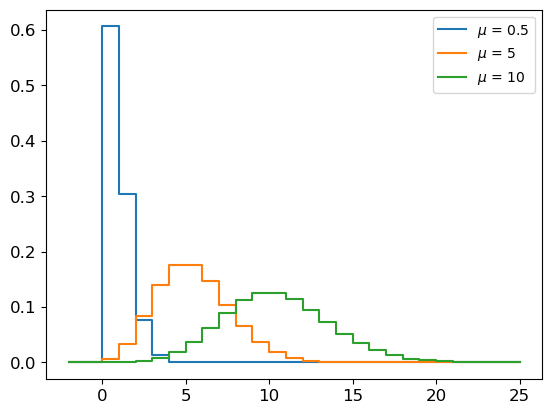

In [44]:
x = np.linspace(-2,25, dtype=int)

mu = .5
plt.step(x, poisson.pmf(x, mu), where = 'post', label = f"$\mu$ = {mu}")

mu = 5
plt.step(x, poisson.pmf(x, mu), where = 'post', label = f"$\mu$ = {mu}")

mu = 10
plt.step(x, poisson.pmf(x, mu), where = 'post', label = f"$\mu$ = {mu}")

plt.legend()

In [51]:
# To calculate mean and variance:

mu = 0.6
mean, var = poisson.stats(mu, moments='mv')
print(f"The mean is {mu} with standard deviation {np.sqrt(var):.2f}")

The mean is 0.6 with standard deviation 0.77
